# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv('../website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [3]:
# Your code here
display(websites.head())
print(websites.columns)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')


In [4]:
# Your comment here
display(websites.WHOIS_UPDATED_DATE.head())

websites.info()

0               None
1               None
2               None
3    12/09/2013 0:45
4    11/04/2017 0:00
Name: WHOIS_UPDATED_DATE, dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
URL                          1781 non-null object
URL_LENGTH                   1781 non-null int64
NUMBER_SPECIAL_CHARACTERS    1781 non-null int64
CHARSET                      1781 non-null object
SERVER                       1780 non-null object
CONTENT_LENGTH               969 non-null float64
WHOIS_COUNTRY                1781 non-null object
WHOIS_STATEPRO               1781 non-null object
WHOIS_REGDATE                1781 non-null object
WHOIS_UPDATED_DATE           1781 non-null object
TCP_CONVERSATION_EXCHANGE    1781 non-null int64
DIST_REMOTE_TCP_PORT         1781 non-null int64
REMOTE_IPS                   1781 non-null int64
APP_BYTES                    1781 non-null int64
SOURCE_APP_PACKETS           1781 non-null int64
REMOTE_APP_PACKETS           1781 non-null int64
SOURCE_APP_BYTES             1781 non-null int64
REMOTE_APP_BYTES             1781 non-null int64
APP

In [5]:
for item in websites.columns.tolist():
    print(item, len(websites[item].unique()))

URL 1781
URL_LENGTH 142
NUMBER_SPECIAL_CHARACTERS 31
CHARSET 9
SERVER 240
CONTENT_LENGTH 638
WHOIS_COUNTRY 49
WHOIS_STATEPRO 182
WHOIS_REGDATE 891
WHOIS_UPDATED_DATE 594
TCP_CONVERSATION_EXCHANGE 103
DIST_REMOTE_TCP_PORT 66
REMOTE_IPS 18
APP_BYTES 825
SOURCE_APP_PACKETS 113
REMOTE_APP_PACKETS 116
SOURCE_APP_BYTES 885
REMOTE_APP_BYTES 822
APP_PACKETS 113
DNS_QUERY_TIMES 11
Type 2


#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

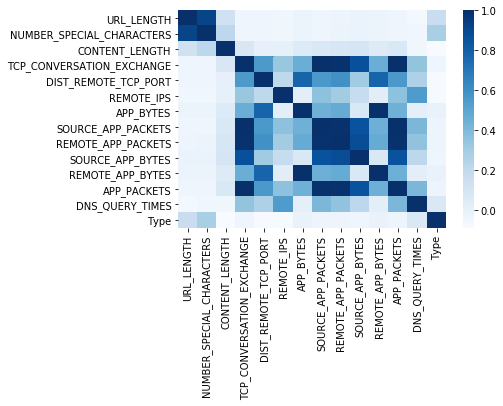

In [6]:
# Your code here
wbesites_corr =websites.corr()
sns.heatmap(wbesites_corr,cmap=plt.cm.Blues)

#### Your comment here
Tenemos varias columnas con una alta correlación, eliminamos 4 de ellas para evitar la correlación y así poder aplicar ciertos modelos de machine learning. 

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [7]:
# Your code here
websites2 = websites.drop(labels = ['REMOTE_APP_PACKETS', 'APP_BYTES', 'TCP_CONVERSATION_EXCHANGE', 'SOURCE_APP_PACKETS','NUMBER_SPECIAL_CHARACTERS'], axis = 1)
display(websites2.head())


,URL,URL_LENGTH,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,0,2,1153,832,9,2.0,1
1,B0_2314,16,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,7,4,1265,1230,17,0.0,0
2,B0_911,16,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,0,0,0,0,0,0.0,0
3,B0_113,17,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,22,3,18784,4380,39,8.0,0
4,B0_403,17,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,2,5,129889,4586,61,4.0,0


#### Your comment here
Eliminamos las siguientes columnas de tipo (int64), con una alta correlación
NUMBER_SPECIAL_CHARACTERS (int64)
REMOTE_APP_PACKETS
APP_BYTES
TCP_CONVERSATION_EXCHANGE
SOURCE_APP_BYTES

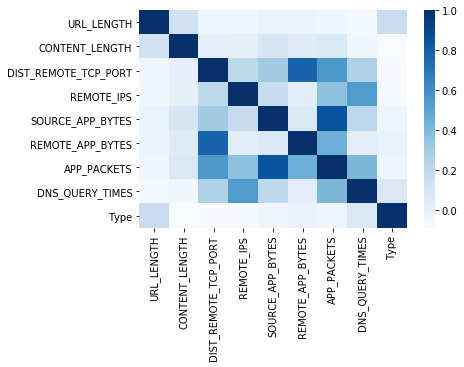

In [8]:
# Print heatmap again
wbesites_corr2 =websites2.corr()
sns.heatmap(wbesites_corr2,cmap=plt.cm.Blues)

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [9]:
# Your code here
b = websites2.isna().sum()
b

URL                       0
URL_LENGTH                0
CHARSET                   0
SERVER                    1
CONTENT_LENGTH          812
WHOIS_COUNTRY             0
WHOIS_STATEPRO            0
WHOIS_REGDATE             0
WHOIS_UPDATED_DATE        0
DIST_REMOTE_TCP_PORT      0
REMOTE_IPS                0
SOURCE_APP_BYTES          0
REMOTE_APP_BYTES          0
APP_PACKETS               0
DNS_QUERY_TIMES           1
Type                      0
dtype: int64

In [10]:
c = []
for col in websites2.columns:
    a = len(websites2[col])
    c.append(a)

In [11]:
print(b/c)

URL                     0.000000
URL_LENGTH              0.000000
CHARSET                 0.000000
SERVER                  0.000561
CONTENT_LENGTH          0.455924
WHOIS_COUNTRY           0.000000
WHOIS_STATEPRO          0.000000
WHOIS_REGDATE           0.000000
WHOIS_UPDATED_DATE      0.000000
DIST_REMOTE_TCP_PORT    0.000000
REMOTE_IPS              0.000000
SOURCE_APP_BYTES        0.000000
REMOTE_APP_BYTES        0.000000
APP_PACKETS             0.000000
DNS_QUERY_TIMES         0.000561
Type                    0.000000
dtype: float64


### handle missing values

In [12]:
#Al tener el 45% de nulos optamos por eliminar la columna en vez de las filas con nulos. Eliminamos Content_length
websites2.drop(labels='CONTENT_LENGTH', axis=1, inplace=True)

In [13]:
len(websites2)

1781

In [14]:
#Eliminamos las filas que tienen valores nulos en DNS query y en Server
websites2.dropna(axis=0, inplace=True)

In [15]:
len(websites2)

1779

### Your comment here
Hemos eliminado la columna 'Content_length' un 45% de nulos y las 2 filas que tenían valores nulos en 'DNS_QUERY_TIMES' y 'SERVER'

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [16]:
# Examine missing values in each column
websites2.isna().sum()

URL                     0
URL_LENGTH              0
CHARSET                 0
SERVER                  0
WHOIS_COUNTRY           0
WHOIS_STATEPRO          0
WHOIS_REGDATE           0
WHOIS_UPDATED_DATE      0
DIST_REMOTE_TCP_PORT    0
REMOTE_IPS              0
SOURCE_APP_BYTES        0
REMOTE_APP_BYTES        0
APP_PACKETS             0
DNS_QUERY_TIMES         0
Type                    0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [17]:
# Your code here
websites2['WHOIS_COUNTRY'].unique()

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [18]:
websites2.replace({'WHOIS_COUNTRY': {"[u'GB'; u'UK']": 'GB', 'United Kingdom': 'GB', 'se': 'SE', 'us': 'US', 'Cyprus': 'CY'}}, inplace=True)
websites2.WHOIS_COUNTRY.unique()

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN',
       'LU', 'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'ru', 'KY',
       'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'KR',
       'HK', 'UA', 'CH', 'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY',
       'KG'], dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

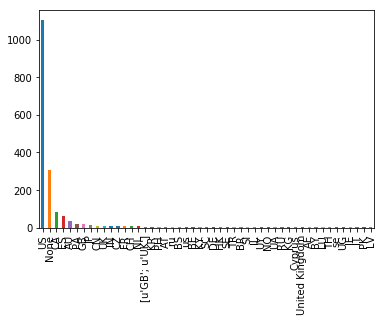

In [19]:
# Your code here
websites.WHOIS_COUNTRY.value_counts().plot.bar()

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [21]:
# Your code here
c = websites2.WHOIS_COUNTRY.value_counts()[:10].index.tolist()
b = websites2.WHOIS_COUNTRY.value_counts()[10:].index.tolist()

#print(c)
#print(b)

for i in b:
    websites2.replace({'WHOIS_COUNTRY': { i: 'OTHER'}}, inplace=True)

In [22]:
display(websites2.WHOIS_COUNTRY.value_counts())

US       1105
None      306
OTHER     110
CA         83
ES         63
AU         35
GB         25
PA         21
JP         11
UK         10
CN         10
Name: WHOIS_COUNTRY, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [23]:
# Your code here
websites2.drop(labels=['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis=1, inplace=True)

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [29]:
# Your code here
websites2.dtypes

URL                      object
URL_LENGTH                int64
CHARSET                  object
SERVER                   object
WHOIS_COUNTRY            object
DIST_REMOTE_TCP_PORT      int64
REMOTE_IPS                int64
SOURCE_APP_BYTES          int64
REMOTE_APP_BYTES          int64
APP_PACKETS               int64
DNS_QUERY_TIMES         float64
Type                      int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [30]:
# Your code here
websites2.drop(labels=['URL'], axis=1, inplace=True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [32]:
# Your code here
websites2.CHARSET.unique()

array(['iso-8859-1', 'UTF-8', 'us-ascii', 'ISO-8859-1', 'utf-8', 'None',
       'windows-1251', 'ISO-8859', 'windows-1252'], dtype=object)

In [33]:
websites2.SERVER.unique()

array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', 'None',
       'Apache/2', 'nginx/1.10.1', 'Apache', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
       'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Oracle-iPlanet-Web-Server/7.0', 'cloudflare-nginx', 'nginx/1.6.2',
       'openresty', 'Heptu web server', 'Pepyaka/1.11.3', 'nginx/1.8.0',
       'nginx/1.10.1 + Phusion Passenger 5.0.30',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5', 'LiteSpeed',
       'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'tsa_c', 'Apache/2.2.0 (Fedora)', 'Apache/2.2.22 (Debian)',
       'Apache/2.2.15 (CentOS)', 'Apache/2.4.25',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips'

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [41]:
def str_contain(x):
    res = 'Other'
    if 'Microsoft' in x:
        res = 'Microsoft'
    if 'Apache' in x:
        res = 'Apache'
    if 'nginx' in x:
        res = 'nginx'
    return res

In [42]:
websites2['SERVER'] = websites2['SERVER'].apply(lambda x: str_contain(x))

![Think Hard](../think-hard.jpg)

#### Your comment here
He aplicado una función a través de lambda para cada fila de la columna. 

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [46]:
# Your code here
websites2['SERVER'].unique()

array(['nginx', 'Apache', 'Microsoft', 'Other'], dtype=object)

In [47]:
# Count `SERVER` value counts here
websites2['SERVER'].value_counts()

Apache       642
Other        504
nginx        435
Microsoft    198
Name: SERVER, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummie values to a new variable `website_dummy`.**

In [50]:
# Your code here
website_dummy = pd.get_dummies(data = websites2, columns=['WHOIS_COUNTRY', 'CHARSET', 'SERVER'], drop_first=True)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [60]:
# Your code here
display(website_dummy.head())
print(website_dummy.dtypes)

,URL_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,...,CHARSET_None,CHARSET_UTF-8,CHARSET_iso-8859-1,CHARSET_us-ascii,CHARSET_utf-8,CHARSET_windows-1251,CHARSET_windows-1252,SERVER_Microsoft,SERVER_Other,SERVER_nginx
0,16,0,2,1153,832,9,2.0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,16,7,4,1265,1230,17,0.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,17,22,3,18784,4380,39,8.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,17,2,5,129889,4586,61,4.0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


URL_LENGTH                int64
DIST_REMOTE_TCP_PORT      int64
REMOTE_IPS                int64
SOURCE_APP_BYTES          int64
REMOTE_APP_BYTES          int64
APP_PACKETS               int64
DNS_QUERY_TIMES         float64
Type                      int64
WHOIS_COUNTRY_CA          uint8
WHOIS_COUNTRY_CN          uint8
WHOIS_COUNTRY_ES          uint8
WHOIS_COUNTRY_GB          uint8
WHOIS_COUNTRY_JP          uint8
WHOIS_COUNTRY_None        uint8
WHOIS_COUNTRY_OTHER       uint8
WHOIS_COUNTRY_PA          uint8
WHOIS_COUNTRY_UK          uint8
WHOIS_COUNTRY_US          uint8
CHARSET_ISO-8859-1        uint8
CHARSET_None              uint8
CHARSET_UTF-8             uint8
CHARSET_iso-8859-1        uint8
CHARSET_us-ascii          uint8
CHARSET_utf-8             uint8
CHARSET_windows-1251      uint8
CHARSET_windows-1252      uint8
SERVER_Microsoft          uint8
SERVER_Other              uint8
SERVER_nginx              uint8
dtype: object


# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [62]:
from sklearn.model_selection import train_test_split
# Your code here:
cols = [col for col in website_dummy.columns if col != 'Type']
X = website_dummy[cols]
y = website_dummy['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


#### For this lab, we will opt to use SVM. 

Support Vector Machines, or SVM, is an algorithm that aims to draw a line or a plane between the two groups such that they are linearly separable and the distance from the observations of each group to the line or plane is maximized. The goal of the algorithm is to find the line or plane that separates the groups. You can read more about this algorithm [here](https://en.wikipedia.org/wiki/Support_vector_machine).

In the next cell, `svm` will be imported for you. **You will initialize the proper estimator, fit the training data, and predict the test data.**

The `sklearn.svm` class documentation can be found [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm). By reading the documentation and searching online, the question you'll need to answer is **which SVM estimator to use**? When you choose the estimator, keep the following in mind:

* Our data are categorical, not continuous.

* We have removed the correlated columns. All columns we have right now are independent.

If your statistical knowledge is not adequate at this moment, don't worry. Just play around and make an informed guess. We'll evaluate your prediction in the next step. If the prediction is unsatisfactory you can move back to this step to modify your estimator.

In [66]:
plt.scatter(X_train, y_train, color = 'red')
#plot.plot(xTrain, linearRegressor.predict(xTrain), color = 'blue')
#plot.title('Salary vs Experience (Training set)')
#plot.xlabel('Years of Experience')
#plot.ylabel('Salary')
#plot.show()

TypeError: scatter() missing 1 required positional argument: 'y'

In [71]:
from sklearn import svm

In [97]:
# Prueba1: modelo Lineal SVC
clf1 = svm.LinearSVC()
clf1.fit(X_train, y_train)
clf1.score(X_test, y_test)

/home/miriam/.local/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6853932584269663

In [99]:
#Prueba2: modelo SVC
clf2 = svm.LinearSVC()
clf2.fit(X_train, y_train)
clf2.score(X_test, y_test)

/home/miriam/.local/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7612359550561798

In [103]:
#Prueba3: Modelo SVC --- OK
clf = svm.SVC(gamma = 0.01)
clf.fit(X_train, y_train)
print('Score:', clf.score(X_test, y_test))
print('Intercept:', clf.intercept_)
y_pred = clf.predict(X_test)

Score: 0.9241573033707865
Intercept: [-0.81653693]


In [104]:
# Computer prediction accuracy
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9241573033707865


# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use SVM to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [116]:
# Your code here
from sklearn.preprocessing import RobustScaler

robut_scaler = RobustScaler().fit(X_train)

X_train_transform = robut_scaler.fit_transform(X_train)
X_test_transform = robut_scaler.transform(X_test)

clf.fit(X_train_transform, y_train)
clf.score(X_test, y_test)
y_pred_transform = clf.predict(X_test_transform)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_transform))

Accuracy: 0.9073033707865169
